Dataset shape: (45528, 19)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-n

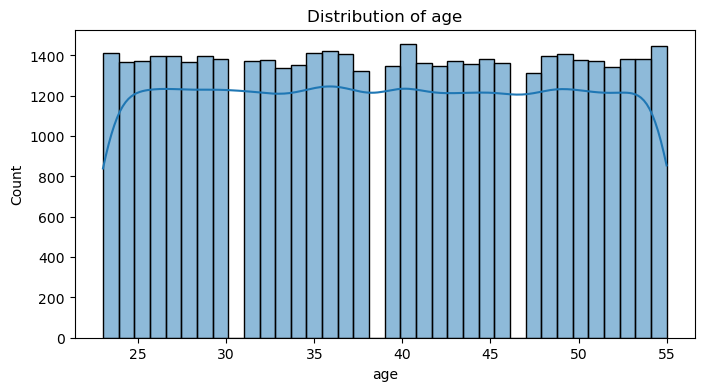

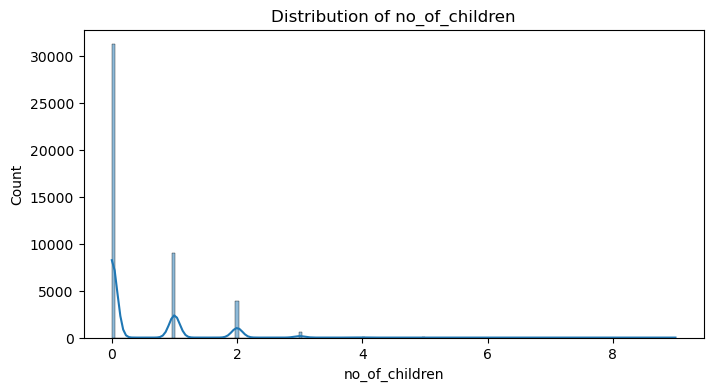

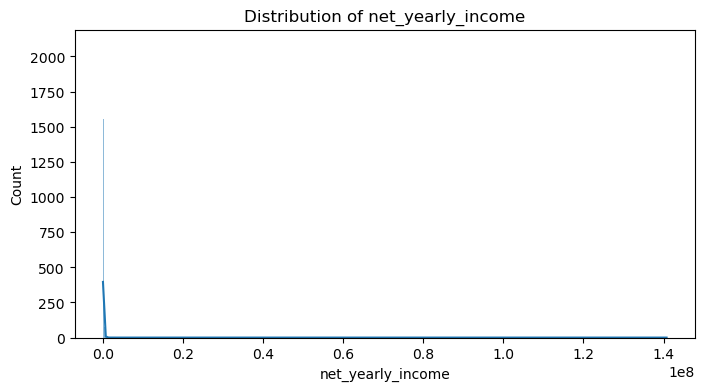

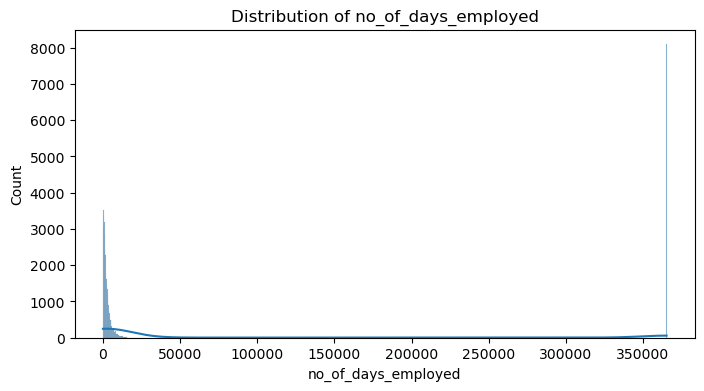

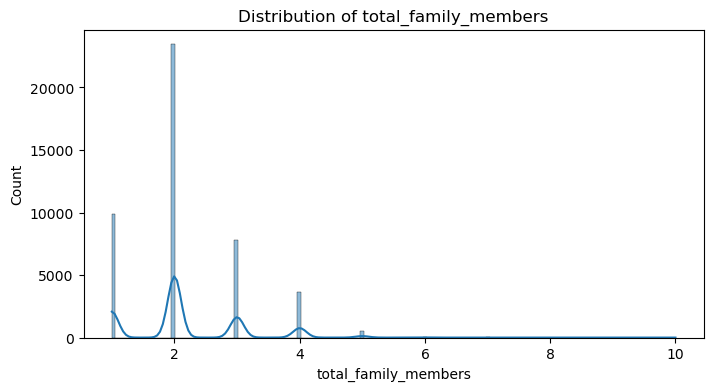

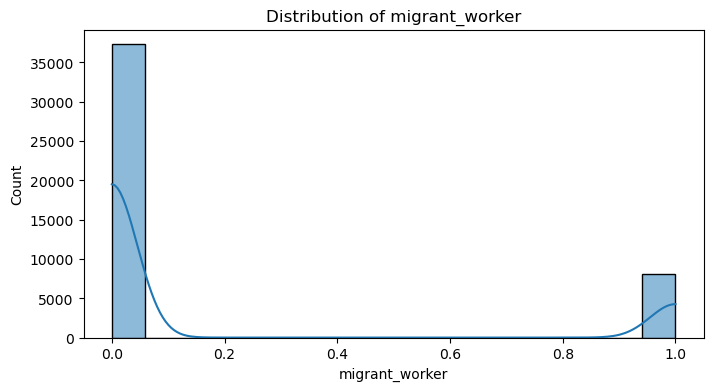

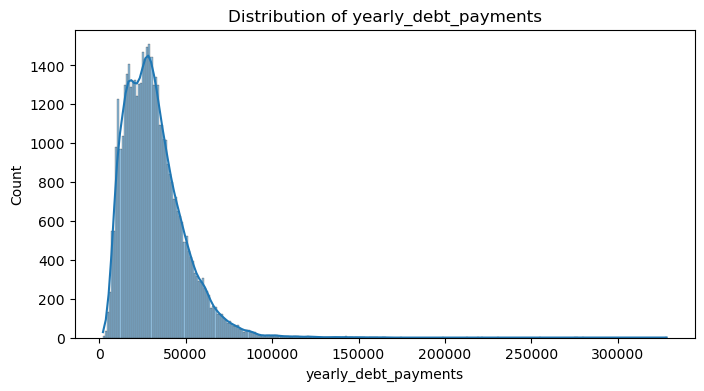

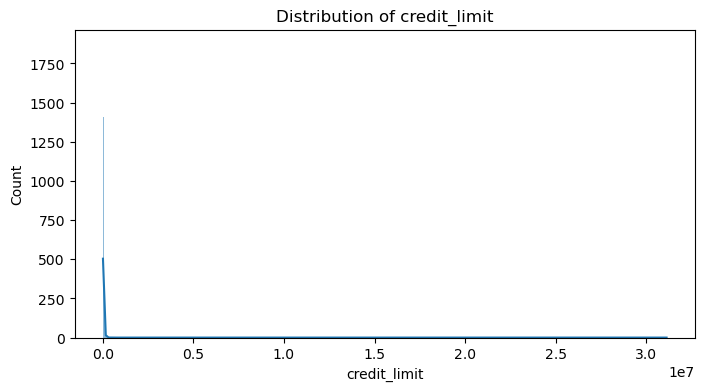

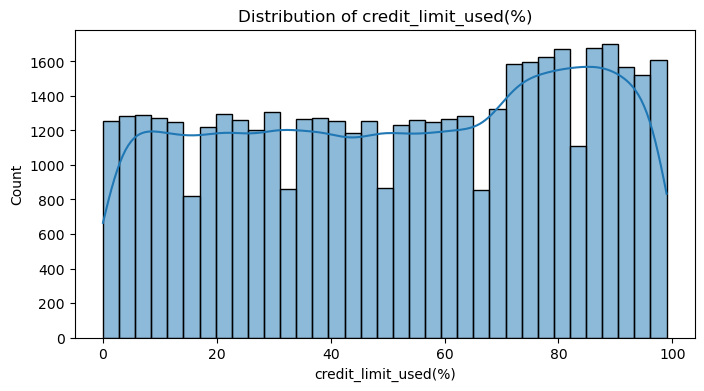

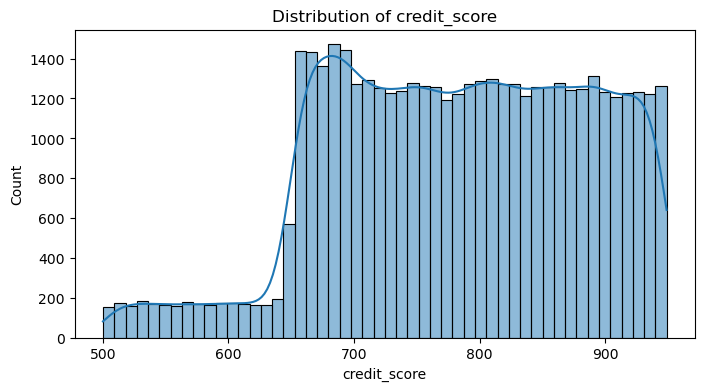

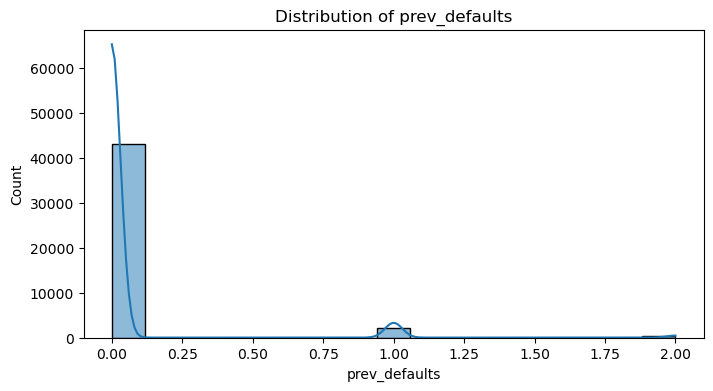

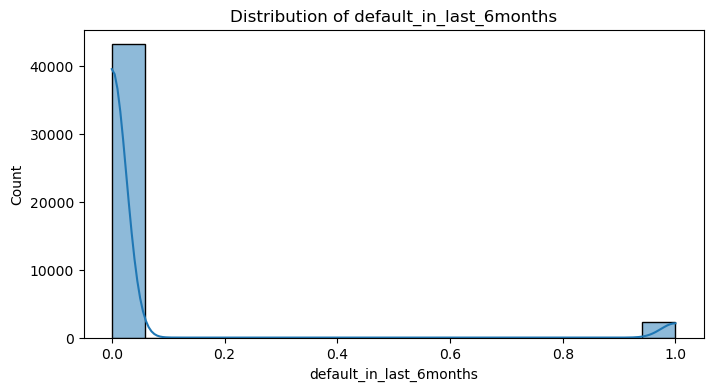

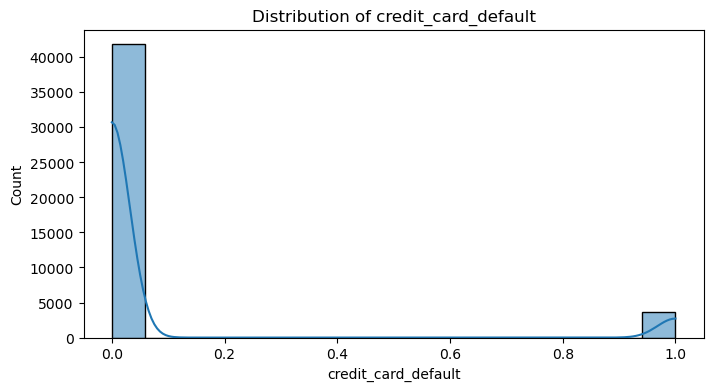

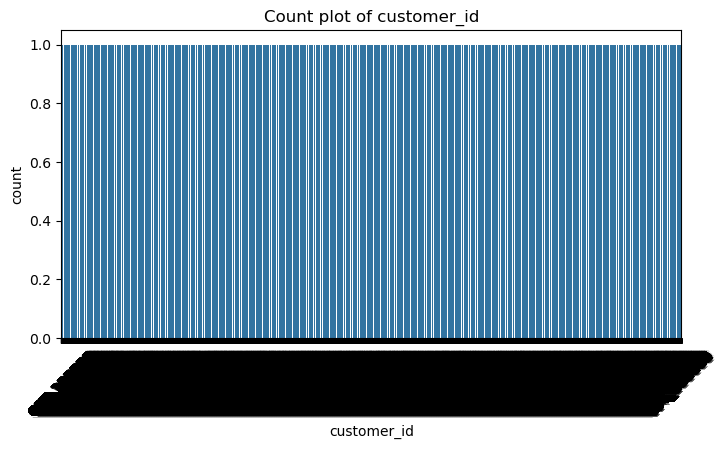

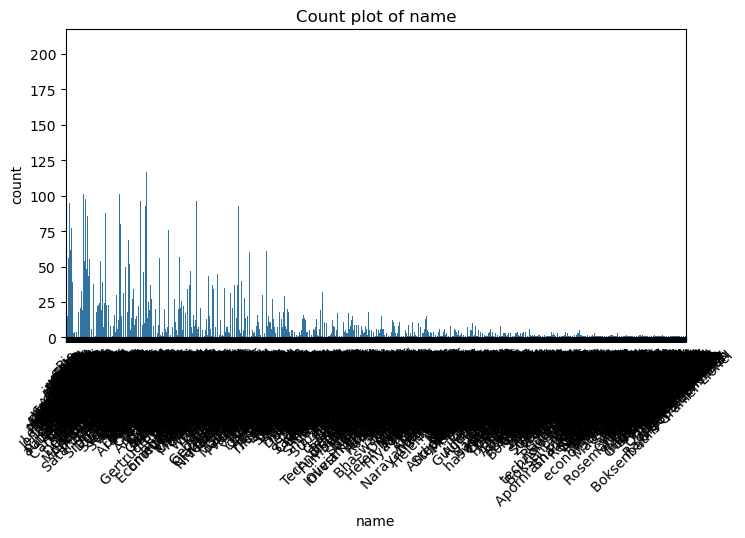

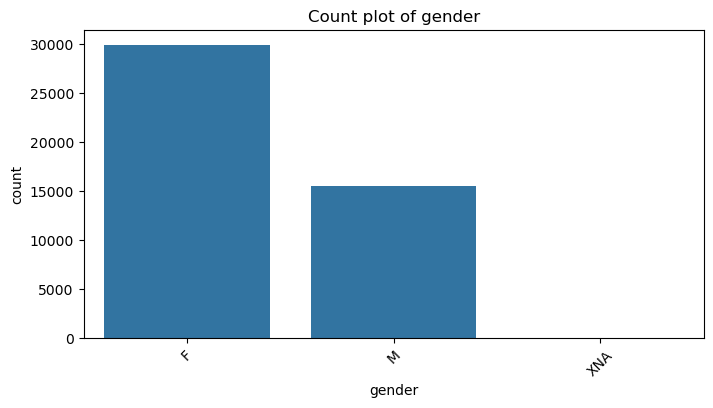

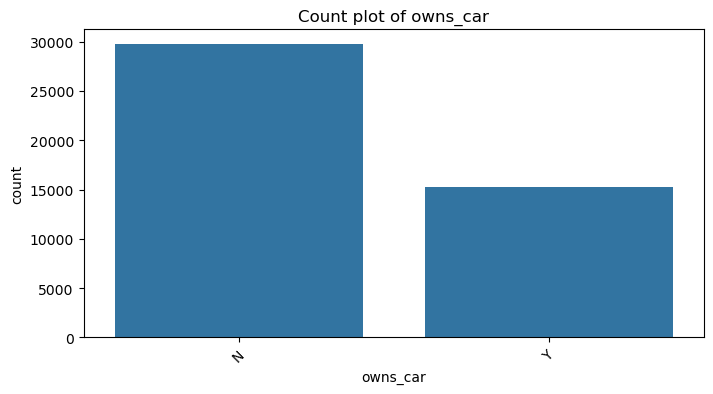

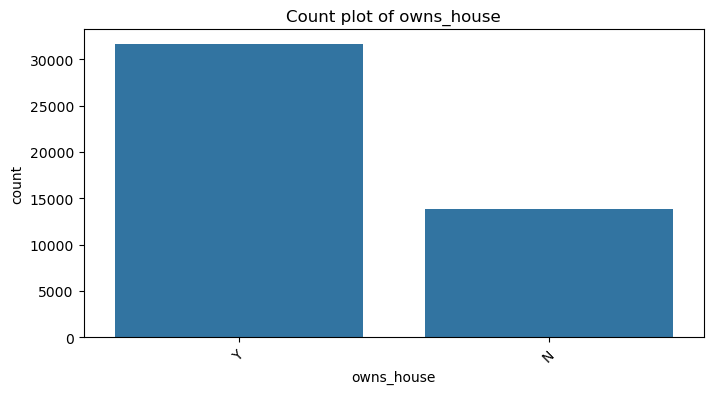

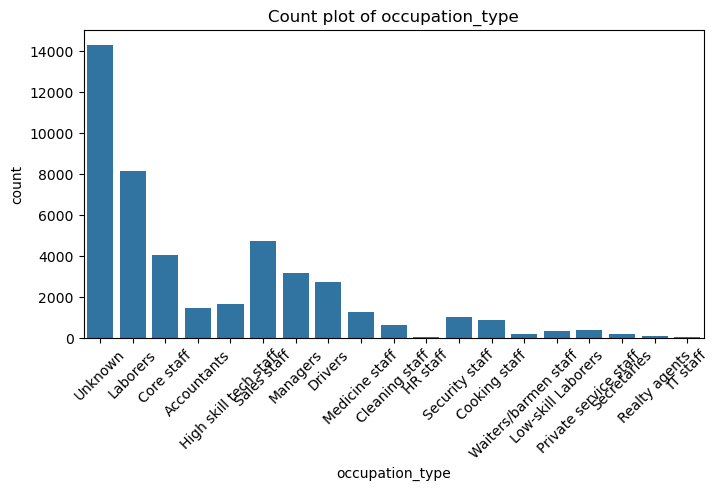

/Users/shubhupadhyay/Desktop/Projects/Credit Risk Analysis/src/preprocessing.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
/Users/shubhupadhyay/Desktop/Projects/Credit Risk Analysis/src/preprocessing.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [5]:
# notebooks/credit_risk_analysis.ipynb

# Import custom modules
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.preprocessing import load_data, impute_missing_values, encode_categorical_features, scale_features, balance_data
from src.eda import basic_statistics, plot_distributions, plot_categorical_counts

# Load dataset
file_path = '/Users/shubhupadhyay/Desktop/Projects/Credit Risk Analysis/data/train.csv'
df = load_data(file_path)

# Separate categorical and numerical features
cat_feats = [col for col in df.columns if df[col].dtype == 'object']
num_feats = [col for col in df.columns if df[col].dtype != 'object']

# Perform EDA
basic_statistics(df)
plot_distributions(df, num_feats)
plot_categorical_counts(df, cat_feats)

# Impute missing values
df = impute_missing_values(df, cat_feats, num_feats)

# Encode categorical features
df_encoded = encode_categorical_features(df, cat_feats)

# Scale numerical features
df_scaled = scale_features(df_encoded, num_feats)


In [8]:
# Import feature engineering functions
import importlib
from src import feature_engineering

# Reload the module to reflect updates
importlib.reload(feature_engineering)

from src.feature_engineering import compute_iv

# Define target variable
target = 'credit_card_default'

# Compute IV and select features
df_selected, iv_df = compute_iv(df_scaled, target)

# Display IV values
print(iv_df)

# Plot IV values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(iv_df["Feature"], iv_df["IV"])
plt.xticks(rotation=45, ha='right')
plt.title("Information Value (IV) of Features")
plt.ylabel("IV")
plt.show()


/Users/shubhupadhyay/Desktop/Projects/Credit Risk Analysis/src/feature_engineering.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bins = np.percentile(notmiss.X, np.linspace(0, 100, max_bin))
/Users/shubhupadhyay/Desktop/Projects/Credit Risk Analysis/src/feature_engineering.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bins = np.percentile(notmiss.X, np.linspace(0, 100, max_bin))
/Users/shubhupadhyay/Desktop/Projects/Credit Risk Analysis/src/feature_engineering.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observe

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.